<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/DeepLearning/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Deep Learning From Scratch</h1>
        <h1>Simple Network</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 561286dc20be22d88e11747647c43573e7e8c8dd

seaborn   : 0.12.2
numpy     : 1.23.5
matplotlib: 3.7.0
watermark : 2.4.2
pandas    : 1.5.3



In [3]:
plt.style.use('d4sci.mplstyle')

## Load Dataset

In [4]:
X_train = np.load('input/X_train.npy')
X_test = np.load('input/X_test.npy')
y_train = np.load('input/y_train.npy')
y_test = np.load('input/y_test.npy')

Preprocessing

In [5]:
input_layer_size = X_train.shape[1]

X_train /= 255.
X_test /= 255.

In [6]:
X_train.shape

(5000, 784)

In [7]:
X_test.shape

(1000, 784)

## Initialize weights

We define the initializatino function as we'll have to call it more than once

In [8]:
def init_weights(L_in, L_out, epsilon = 0.12):
    return 2*np.random.rand(L_out, L_in+1)*epsilon - epsilon

Set the layer sizes we'll be using

In [9]:
hidden_layer_size = 50
num_labels = 10

Initialize the weights

In [10]:
Theta1 = init_weights(input_layer_size, hidden_layer_size)
Theta2 = init_weights(hidden_layer_size, num_labels)

## Utility functions

One-hot encoding to define the labels

In [11]:
def one_hot(K, pos):
    y0 = np.zeros(K)
    y0[pos] = 1

    return y0

In [12]:
y_train

array([5, 0, 4, ..., 2, 1, 2], dtype=uint8)

In [13]:
one_hot(10, 5)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Activation function, just as before

In [14]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def sigmoidGradient(z):
    h = sigmoid(z)
    return h*(1-h)

def accuracy(y_, y):
    return np.mean((y_ == y.flatten()))*100.

## Forward Propagation and Prediction

Same functions defined above

In [15]:
def forward(Theta, X, active):
    N = X.shape[0]

    # Add the bias column
    X_ = np.concatenate((np.ones((N, 1)), X), 1)

    # Multiply by the weights
    z = np.dot(X_, Theta.T)

    # Apply the activation function
    a = active(z)

    return a

def predict(Theta1, Theta2, X):
    h1 = forward(Theta1, X, sigmoid)
    h2 = forward(Theta2, h1, sigmoid)

    return np.argmax(h2, 1)

## Back propagation

In [16]:
def backprop(Theta1, Theta2, X, y):
    N = X.shape[0]
    K = Theta2.shape[0]

    J = 0

    Delta2 = np.zeros(Theta2.shape)
    Delta1 = np.zeros(Theta1.shape)

    for i in range(N):
        # Forward propagation, saving intermediate results
        a1 = np.concatenate(([1], X[i]))  # Input layer

        z2 = np.dot(Theta1, a1)
        h2 = sigmoid(z2)
        a2 = np.concatenate(([1], h2))  # Hidden Layer

        z3 = np.dot(Theta2, a2)
        h3 = sigmoid(z3)  # Output layer
        a3 = h3
        
        y0 = one_hot(K, y[i])

        # Cross entropy
        J -= np.dot(y0.T, np.log(a3))+np.dot((1-y0).T, np.log(1-a3))

        # Calculate the weight deltas
        delta_3 = a3-y0
        delta_2 = np.dot(Theta2.T, delta_3)[1:]*sigmoidGradient(z2)

        Delta2 += np.outer(delta_3, a2)
        Delta1 += np.outer(delta_2, a1)

    J /= N

    Theta1_grad = Delta1/N
    Theta2_grad = Delta2/N

    return [J, Theta1_grad, Theta2_grad]

## Training procedure
The basic idea is the same as for the linear and logistic regression cases

In [17]:
step = 0
tol = 1e-3 # Minimum different in error between two consecutive steps
J_old = 1/tol
diff = 1

acc_train = []
acc_test = []
J_val = []
steps = []
alpha = 0.5

while diff > tol:
    J_train, Theta1_grad, Theta2_grad = backprop(Theta1, Theta2, X_train, y_train)

    diff = abs(J_old-J_train)
    J_old = J_train
    J_val.append(J_train)
    
    step += 1

    Theta1 -= alpha*Theta1_grad
    Theta2 -= alpha*Theta2_grad

    
    if step % 10 == 0:
        pred_train = predict(Theta1, Theta2, X_train)
        pred_test = predict(Theta1, Theta2, X_test)

        J_test, T1_grad, T2_grad = backprop(Theta1, Theta2, X_test, y_test)
        
        acc_train.append(accuracy(pred_train, y_train))
        acc_test.append(accuracy(pred_test, y_test))
        steps.append(step)
        
        print(step, J_train, J_test, acc_train[-1], acc_test[-1])

    
print(step, J_train, J_test, acc_train[-1], acc_test[-1])
print('DONE')

10 3.1090196544523687 3.1018220073714033 48.88 44.6
20 2.8741145492471056 2.876521440556346 62.08 57.49999999999999
30 2.539056788345286 2.561443804360274 67.64 63.7
40 2.2093394390061314 2.2572762014658316 71.54 67.4
50 1.9527249680260363 2.0204692818613488 75.28 70.1
60 1.7594155691911362 1.8406633154534953 78.16 73.1
70 1.6080174909333818 1.6991135555175656 80.38 75.2
80 1.4850521620413033 1.583973873145704 82.08 76.8
90 1.382779936658271 1.4883399536400865 83.6 78.60000000000001
100 1.2962994927375566 1.4077672297307642 84.84 80.2
110 1.2221671385005461 1.3390665159039132 85.54 81.6
120 1.1578390376067842 1.2798245073616559 86.16 82.89999999999999
130 1.1014136892608475 1.228195922025151 86.86 83.5
140 1.0514685753598134 1.1827763622999572 87.4 84.39999999999999
150 1.0069342408658237 1.1425005404634219 88.18 85.1
160 0.9669951047060975 1.1065564275225772 88.52 85.2
170 0.9310145066014595 1.0743156699947887 88.84 85.7
180 0.8984808786443338 1.0452803989688113 89.3 86.2
190 0.868970

## Accuracy during training

Text(0, 0.5, 'Cost function')

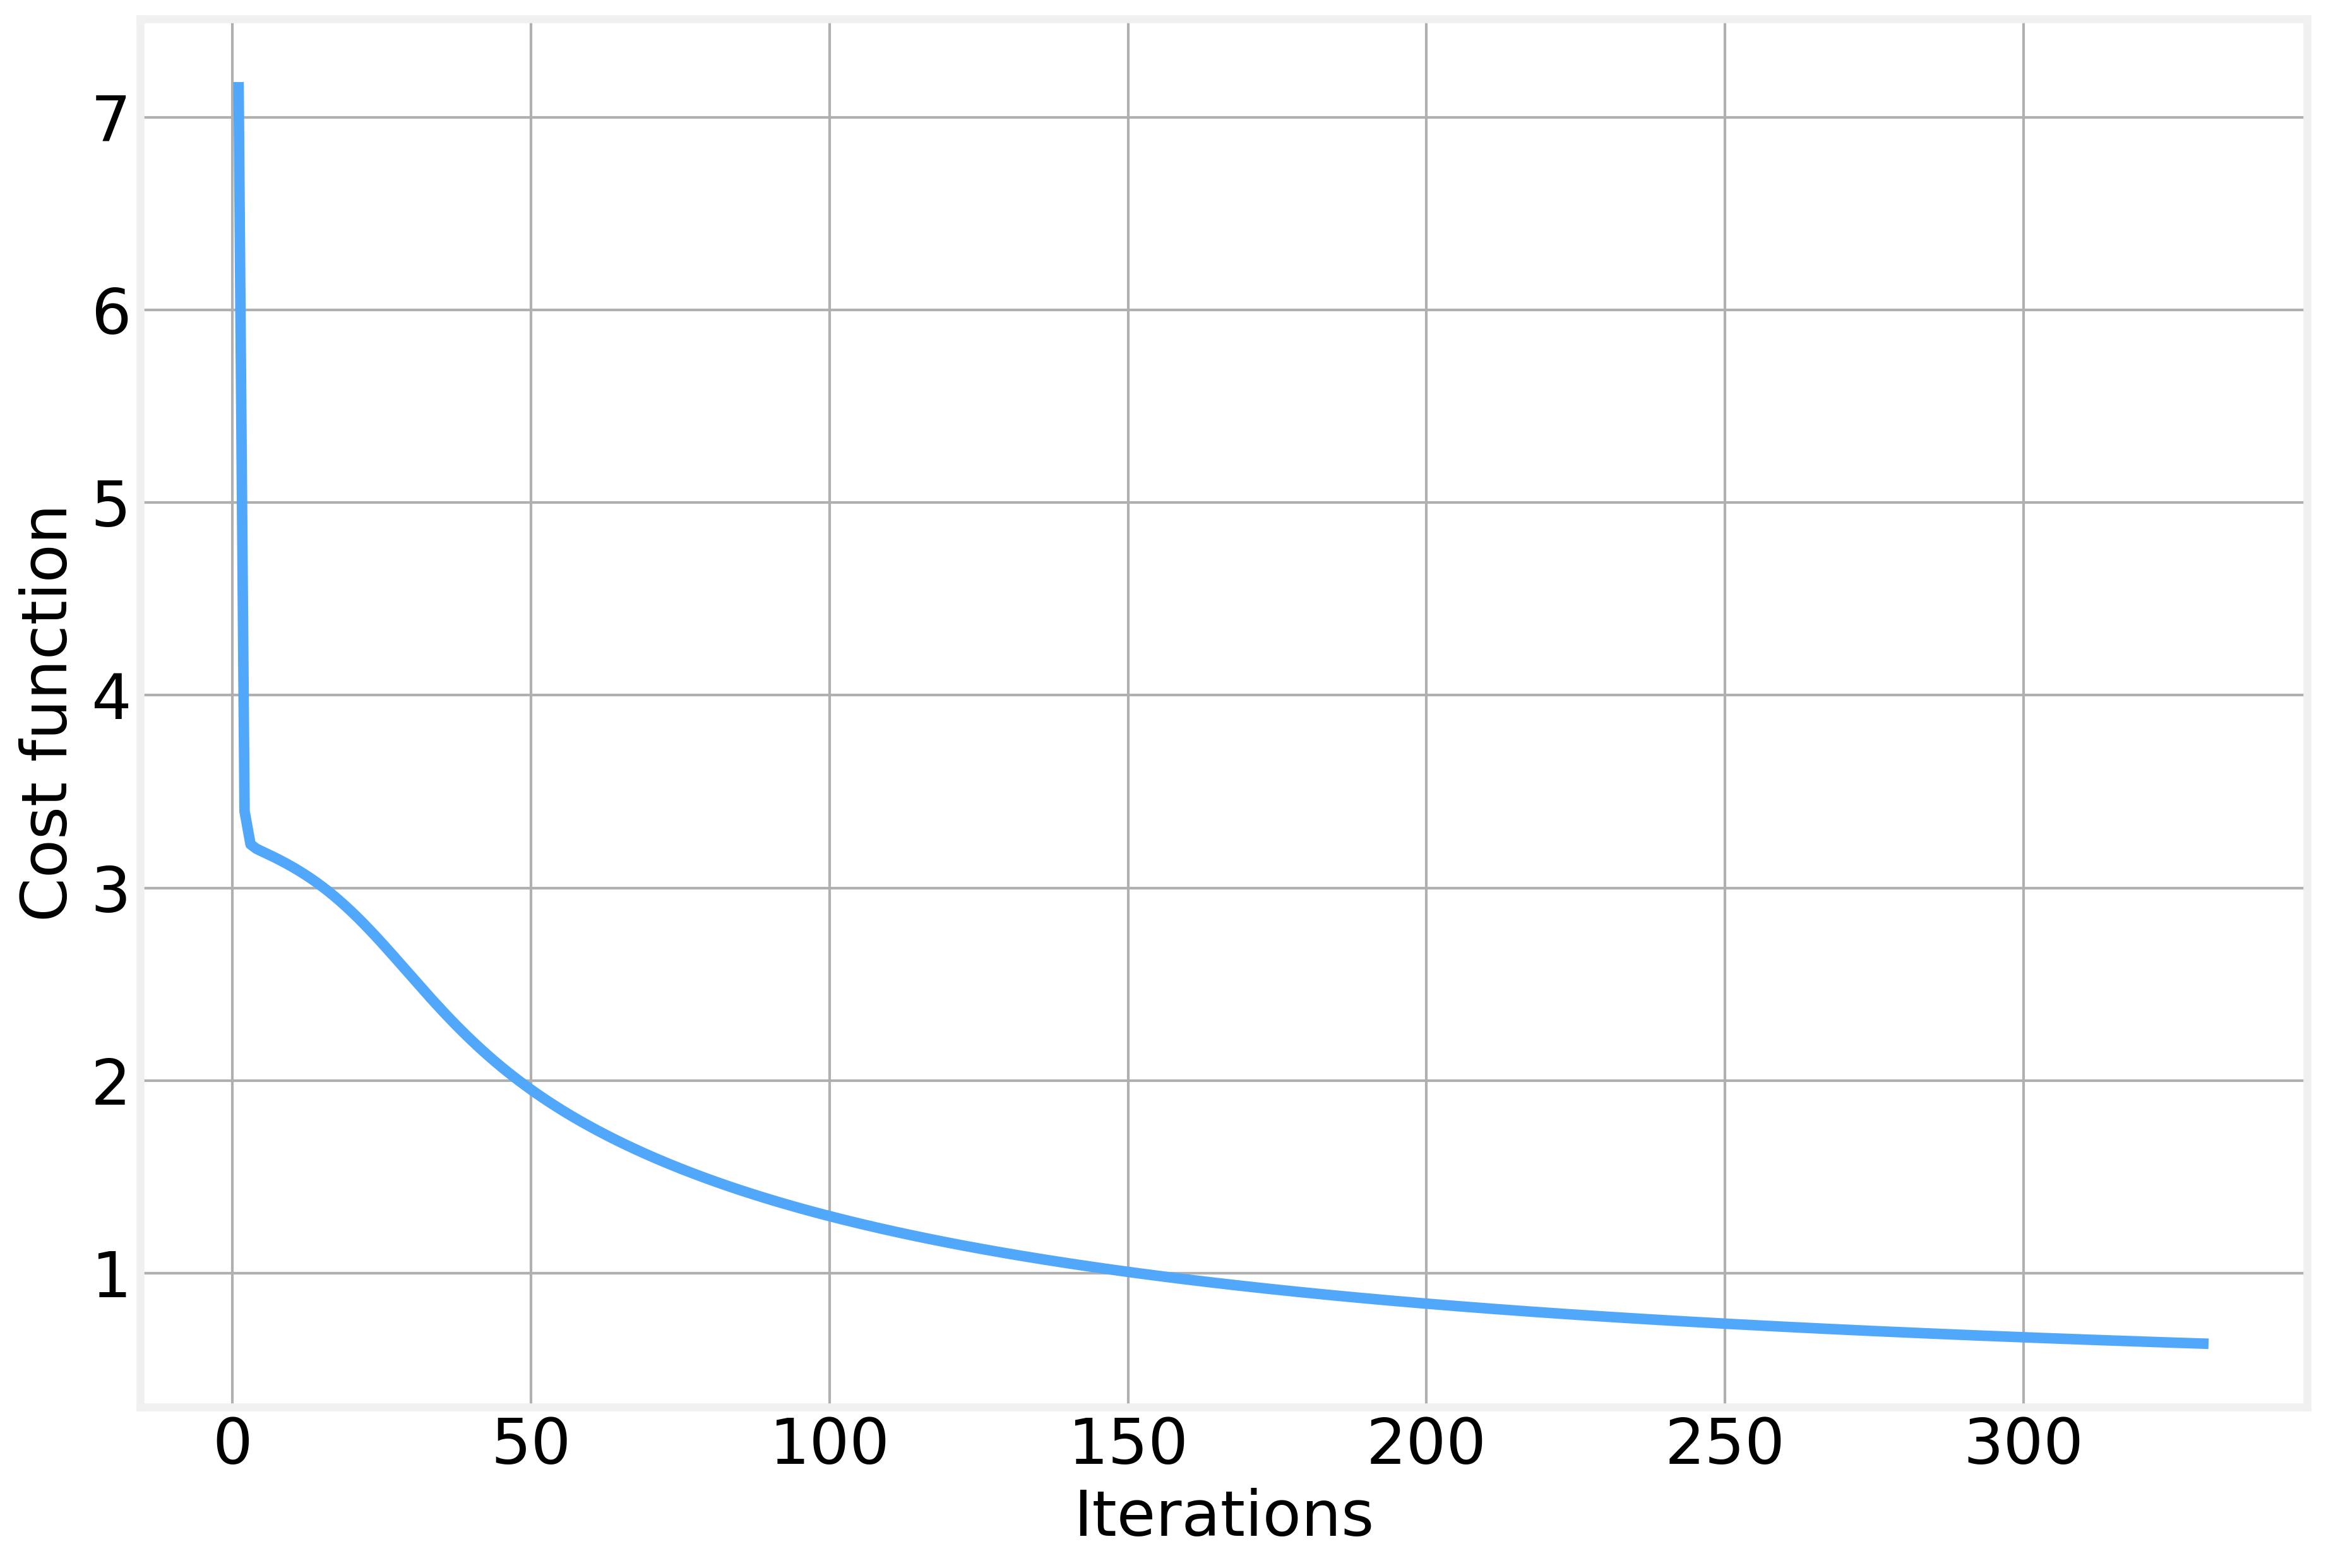

In [18]:
plt.plot(np.arange(1, len(J_val)+1), J_val)
plt.xlabel("Iterations")
plt.ylabel("Cost function")

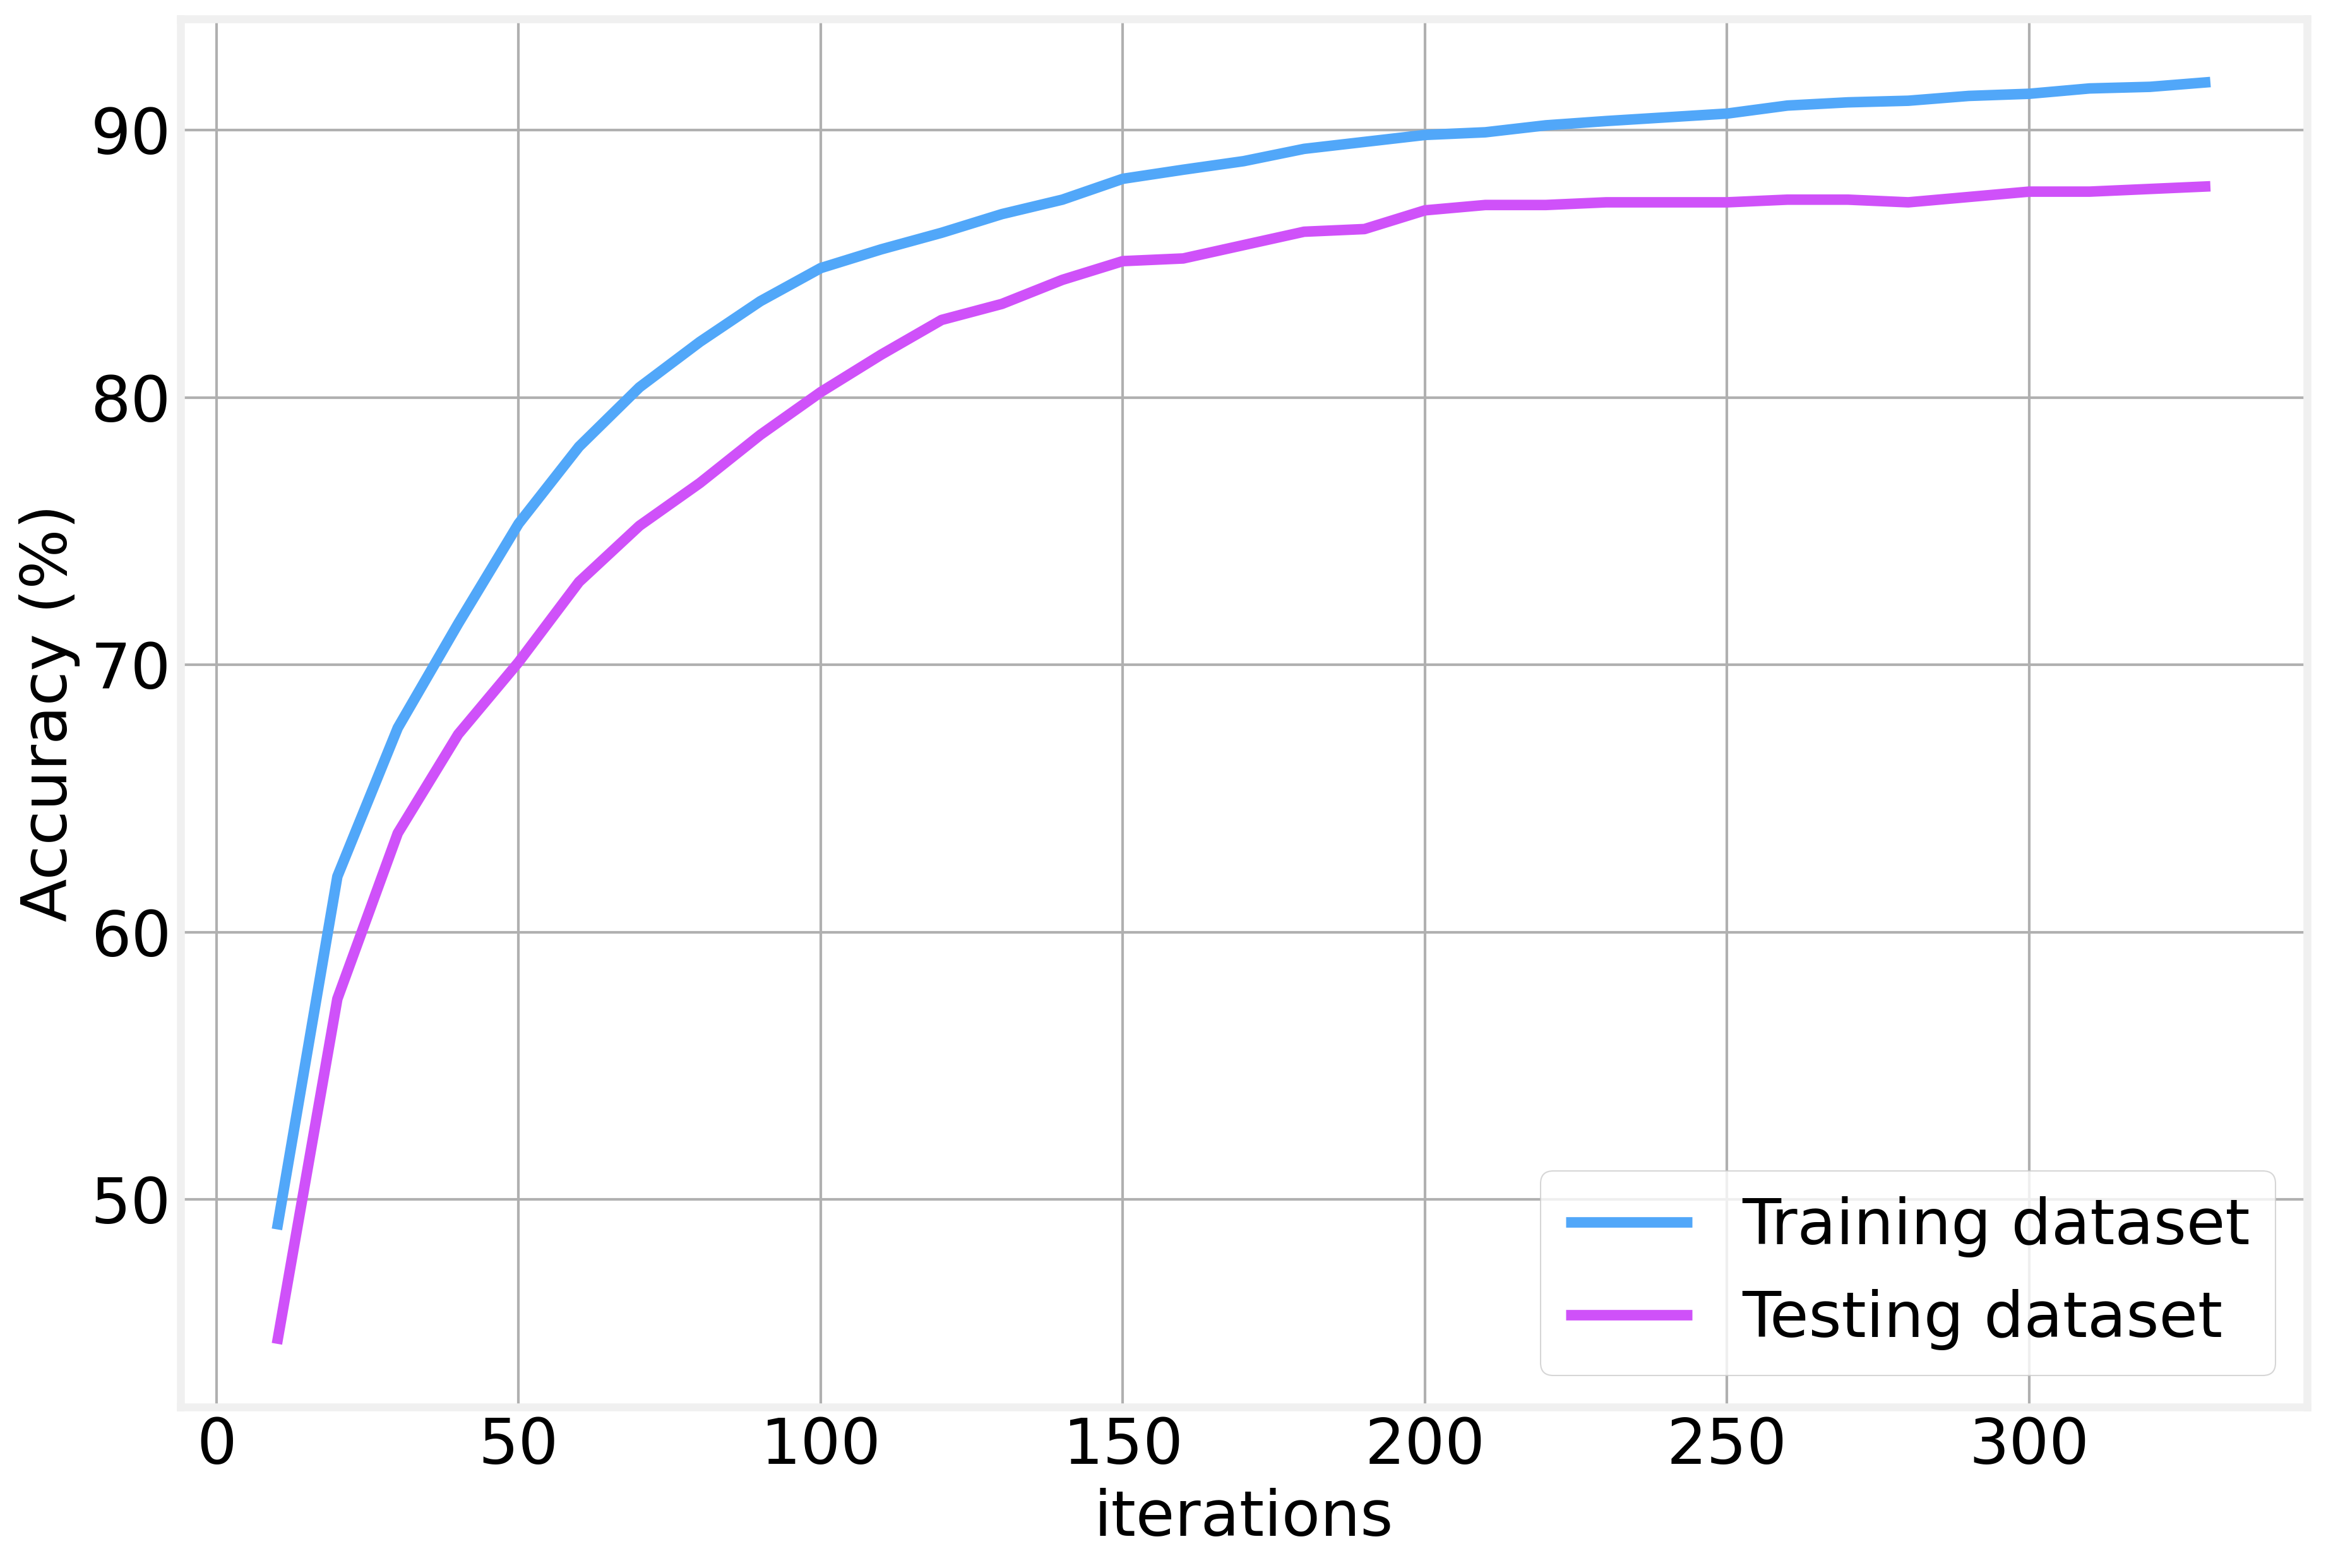

In [19]:
plt.plot(steps, acc_train, label='Training dataset')
plt.plot(steps, acc_test, label='Testing dataset')
plt.xlabel("iterations")
plt.ylabel("Accuracy (%)")
plt.legend()

## Save the trained model

In [20]:
np.save('Theta1_short.npy', Theta1)
np.save('Theta2_short.npy', Theta2)

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/DeepLearning/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>